# ANALIZA EVROPSKIH SMUČIŠČ

V projektni nalogi analiziram evropska smučišča, objavljena na priljubljeni spletni strani Bergfex. 

In [18]:
from IPython.display import display
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np

smucisca = pd.read_csv("smucisca.csv")
drzave = pd.read_csv("prebivalci.csv") 

Začnimo s preprostim vprašanjem, katera smučišča nam ponujajo največ kilometrov prog, in izpišimo nekaj osnovnih lastnosti favoritov. 

Text(0.5, 1.0, '10 največjih smučišč')

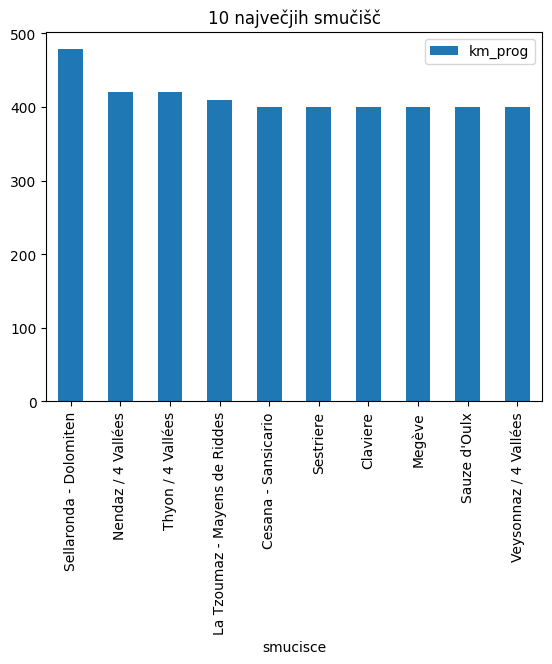

In [52]:
najvecja_smucisca = smucisca.sort_values("km_prog", ascending=False)[:10]
najvecja_smucisca.plot.bar(x="smucisce", y="km_prog").set_title("10 največjih smučišč")

In [88]:
display(najvecja_smucisca.drop(["interno_ime", "4_vallées"], axis=1))

,smucisce,drzava,nadmorska_visina,km_prog,karta,valuta
1422,Sellaronda - Dolomiten,IT,1.200 - 3.000,478.0,83.0,€
1042,Nendaz / 4 Vallées,CH,1.350 - 3.330,420.0,82.0,CHF
2034,Thyon / 4 Vallées,CH,1.470 - 2.450,420.0,79.0,€
1194,La Tzoumaz - Mayens de Riddes,CH,1.500 - 3.300,410.0,71.0,CHF
1779,Cesana - Sansicario,IT,1.350 - 2.823,400.0,44.0,€
1724,Sestriere,IT,2.035 - 2.823,400.0,54.0,€
861,Claviere,IT,1.350 - 2.823,400.0,44.0,€
483,Megève,FR,1.050 - 2.350,400.0,61.5,€
1444,Sauze d'Oulx,IT,1.350 - 2.823,400.0,44.0,€
1695,Veysonnaz / 4 Vallées,CH,1.350 - 2.700,400.0,82.0,CHF


Vidimo, da so največja smučišča locirana predvsem v Italiji in Švici. Ponujajo nam tudi do dobrih 470 kilometrov prog, za katere je potrebno odšteti med 44 in 83 eur oz. 71 do 82 CHF, in ki nas vodijo tudi do 3300 metrov nadmorske višine. 
Opazimo, da se na seznamu največjih desetih nahaja več smučišč iz resorta 4 Vallées, kar nas napelje na idejo, da seštevek kilometrov prog v omenjenem resortu preseže smuščiče Sellaronda v Dolomitih, ki sicer vodi na našem seznamu. Preverimo:

In [89]:
smucisca["4_vallées"] = smucisca["smucisce"].str.contains("4 Vallées")
vsota = smucisca.groupby("4_vallées").sum("km_prog")
display(vsota.drop(["karta"], axis="columns"))

,km_prog
4_vallées,
False,43510.9
True,1442.0


Zgornja enostavna tabela nam pove, da seštevek prog na vseh smučiščih, ki so del resorta 4 Vallées, znaša 1442 kilometrov, kar krepko presega doslej vodilno smučišče Sellaronda.

Nato si poglejmo, kakšna je dolžina smučarskih prog vsake od držav, če seštejemo proge vseh njenih smučišč. Ta podatek bomo v naslednjem koraku uporabili, da izračunamo kilometre prog na prebivalca in poiščemo najbolj "smučarsko" državo.

In [90]:
vsota_prog = smucisca.drop(["karta", "4_vallées"], axis="columns").groupby(["drzava"]).sum("km_prog")
display(vsota_prog)

,km_prog
drzava,
AD,303.0
AT,12922.1
BA,136.0
BE,9.1
CH,8631.9
CZ,606.7
DE,1304.2
ES,1152.5
FR,11096.9


Text(0.5, 1.0, 'Delež smučišč po državah')

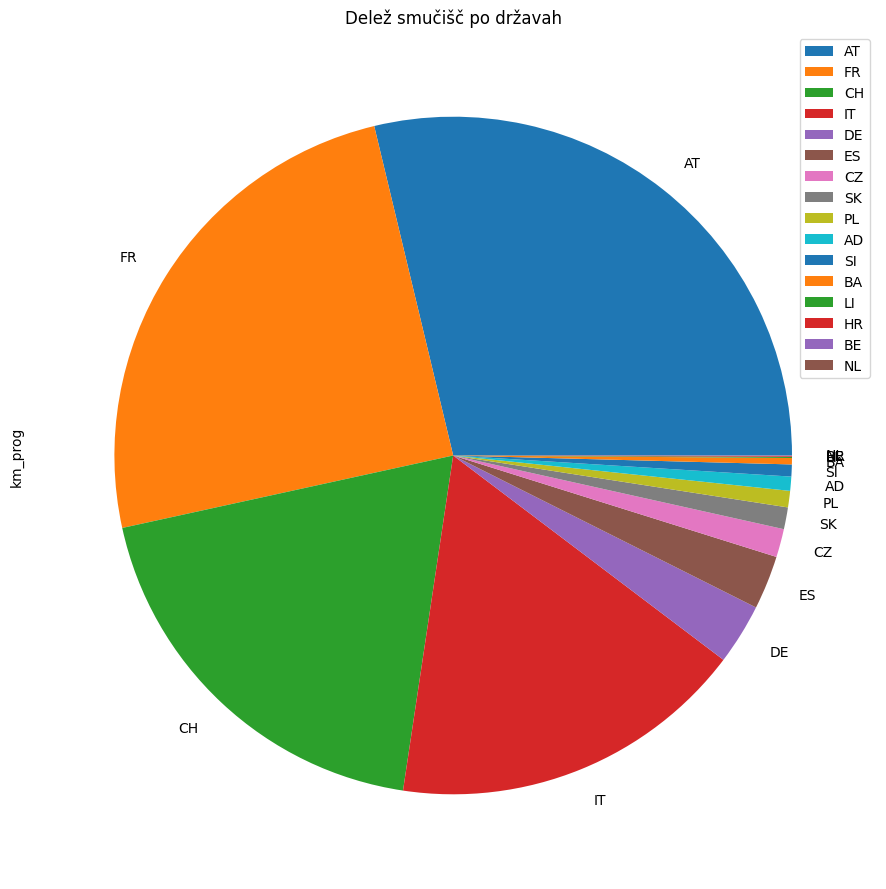

In [91]:
najvec_prog = vsota_prog.sort_values(by="km_prog", ascending=False)
najvec_prog.plot.pie(y="km_prog", figsize=(11, 11)).set_title("Delež smučišč po državah")

Tortni diagram prikazuje, da največji delež evropskih smučišč leži v Avstriji, sledi ji Francija in nato Švica. Izsledek ni presenetljiv, saj je Avstrija znana po dobri smučarski infrastrukturi, ki je posledica ugodnih geografskih razmer: gre za gorato državo, kar s primernim podbnebjem omogoča dolge (celo celoletne) smučarske sezone. Država v razvoj/ohranjanje smučišč vlaga veliko sredstev, saj ta zagotavljajo delovna mesta, poleg tega je dobro razvito tudi cestno in železniške omrežje po državi, kar dela smučišča dostopna vsem. Smučarski turizem je tako ena od vodilnih panog avstrijskega gospodarstva, zato se trudijo za razvoj trajnostnega turističnega modela, ki bi še dolgo, kljub podnebnim spremembam, privabljal smučarje iz celega sveta. Nenazadnje pa ta šport v državi, kjer se je rodila njegova moderna oblika, igra tudi pomembno kulturno vlogo.

Poglejmo si torej, ali je Avstrija vodilna tudi po kilometrih smučarskih prog "per capita", torej na prebivalca.

In [92]:
proge_in_prebivalci = pd.merge(drzave, vsota_prog, on="drzava")

proge_in_prebivalci["m_prog_na_prebivalca"] = (proge_in_prebivalci["km_prog"] * 1000) / proge_in_prebivalci["st_prebivalcev"]
proge_in_prebivalci = proge_in_prebivalci.sort_values(by="m_prog_na_prebivalca")
display(proge_in_prebivalci)

,drzava,st_prebivalcev,km_prog,m_prog_na_prebivalca
8,NL,18346819,4.0,0.000218
9,BE,11758603,9.1,0.000774
3,HR,3848160,16.8,0.004366
10,PL,38140910,352.4,0.009239
1,DE,84075074,1304.2,0.015512
14,ES,47889958,1152.5,0.024066
15,BA,3140096,136.0,0.043311
5,CZ,10609240,606.7,0.057186
13,SK,5474881,467.4,0.085372
2,SI,2117072,257.0,0.121394


Ker je v večini držav razmerje med kilometri prog in številom prebivalcev precej majhno, smo ga v zgornji tabeli prikazali v metrih, namesto v kilometrih. Poglejmo si še vizualizacijo izračunanih podatkov.

Text(0.5, 1.0, 'Metri smučarskih prog na prebivalca')

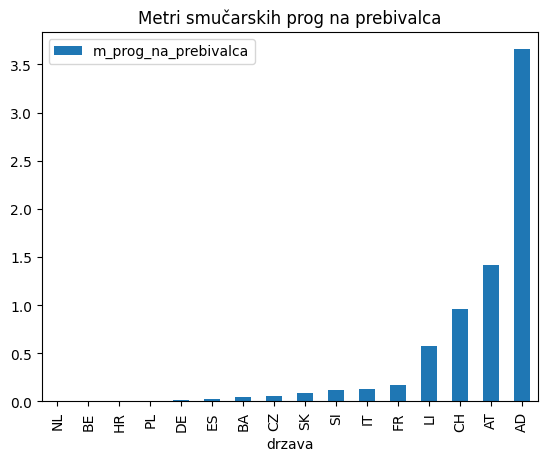

In [93]:
proge_in_prebivalci.plot.bar(x="drzava", y="m_prog_na_prebivalca").set_title("Metri smučarskih prog na prebivalca")

Ugotovimo, da v tej kategoriji Avstrijo premaga Andora. Razlog je  predvsem relativno majhno število prebivalcev v Andori, ki se sicer s 303 km prog ne more primerjati z dobrimi 10 000 v naši sosednji državi. Zanimivo je tudi, da ima Andora približno toliko kilometrov smučarskih prog kot Slovenija, čeprav je Slovenija precej večja. Razlogi so zopet geografski (visoka nadmorska višina, primeren relief).

Primerjajmo še število smučišč per capita. Slovenci smo znani  po številnih manjših smučiščih, predvsem v preteklosti je vsaka vas imela svojega. Morda smo vodilni vsaj v tej kategoriji?

Text(0.5, 1.0, 'Smučišča na prebivalca')

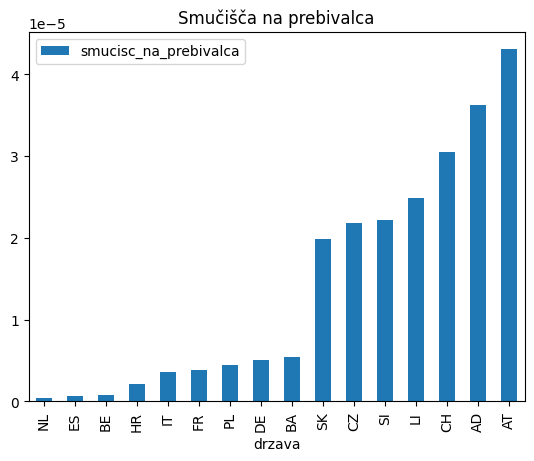

In [94]:
vsota_smucisc = smucisca["drzava"].value_counts()
smucisca_in_prebivalci = pd.merge(drzave, vsota_smucisc, on="drzava")

smucisca_in_prebivalci["smucisc_na_prebivalca"] = smucisca_in_prebivalci["count"] / smucisca_in_prebivalci["st_prebivalcev"]
smucisca_in_prebivalci = smucisca_in_prebivalci.sort_values(by="smucisc_na_prebivalca")

smucisca_in_prebivalci.plot.bar(x="drzava", y="smucisc_na_prebivalca").set_title("Smučišča na prebivalca")

V število smučišč na prebivalca zopet zmagajo naši severni sosedje, a Slovenci smo po pričakovanjih med najboljšimi petimi. Smo takoj za štirimi izrazito goratimi državami, kar pove, da v evropskem merilu resnično izstopamo - kljub reliefu, ki ni v celoti gorski, premoremo veliko število smučišč. A v povezavi s prejšnjim grafom lahko trdimo, da so ta manjša in s kratkimi programi.

Zanima nas tudi korelacija med kilometri prog, ki jih ponuja posamezno smučišče, in ceno dnevne smučarske vozovnice. Ker nimajo vse analizirane države eura, bomo takšne primere izpustili in analizirali le smučišča na območju eura - to pa sicer nima znatnega vpliva na rezultate, saj smo zgoraj ugotovili, da se približno 3/4 evropskih smučišč nahaja v Avstriji, Franciji, Italiji, Nemčiji in Španiji, torej v euro območju.  

<function matplotlib.pyplot.show(close=None, block=None)>

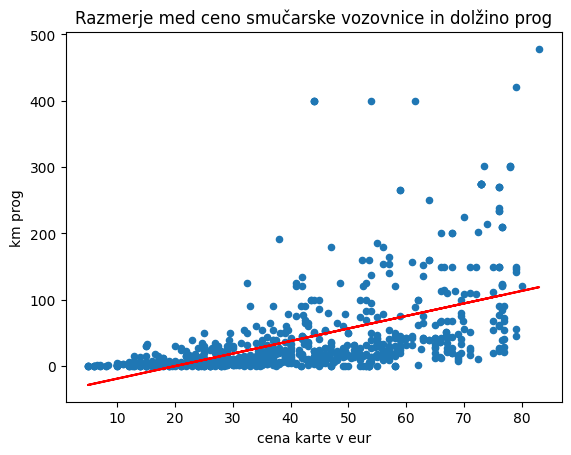

In [95]:

smucisca_v_euru = smucisca[smucisca["valuta"] == "€"]
smucisca_v_euru[["karta", "km_prog"]].plot.scatter(x="karta", y="km_prog")
plt.xlabel("cena karte v eur")
plt.ylabel("km prog")
koeficienti = np.polyfit(smucisca_v_euru["karta"], smucisca_v_euru["km_prog"], deg=1)
trendna_crta = np.poly1d(koeficienti)
plt.plot(smucisca_v_euru["karta"], trendna_crta(smucisca_v_euru["karta"]), color="red")
plt.title("Razmerje med ceno smučarske vozovnice in dolžino prog")
plt.show

Ugotovimo, da je opazna povezava med ceno karte in kilometri prog na smučišču: več prog največkrat pomeni tudi dražja smučarska karta, kar je pričakovano. 

Če se ponovno navežemo na število smučišč v državah, kar smo raziskovali pred cenovno analizo, globalno segrevanje trenutno povzroča upad le teh. Na udaru so predvsem države južne Evrope in na splošno nižje ležeča smučišča. S podatki, pridobljenimi iz Bergfexa, je to težko neposredno dokazati, a z brskanjem po spletu ugotovimo, da je bila večina smučišč brez zabeležene cene smučarske vozovnice to sezono zaprta ali je zaradi slabih pogojev delovala le nekaj dni. S še večjo gotovostjo pa lahko to trdimo za smučišča, ki nimajo navedene niti dolžine prog. Zato bomo podatke filtrirali po ceni karte in navedeni dolžini krog ter prikazali, katere države so najbolj na udaru glede pogojev za obratovanje smučišč.

In [96]:
zaprta_smucisca = smucisca[smucisca["karta"].isnull()].drop(["karta", "4_vallées"], axis="columns")
zaprta_smucisca = zaprta_smucisca[zaprta_smucisca["km_prog"] == 0.0]
display(zaprta_smucisca)

,interno_ime,smucisce,drzava,nadmorska_visina,km_prog,valuta
1,schilifte-millruette,Millrütte,AT,NaN,0.0,NaN
10,frauenalpe,Murauer Frauenalpe,AT,1.500 - 2.000,0.0,NaN
14,marmolada-passo-fedaia,Passo Fedaia - Marmolada,IT,NaN,0.0,NaN
24,gruenten,Grünten,DE,NaN,0.0,NaN
50,ryterski-raj,Ryterski Raj,PL,408 - 628,0.0,NaN
...,...,...,...,...,...,...
2138,smrek,Smrek,PL,634 - 700,0.0,NaN
2170,czarnow,Czarnów,PL,575 - 706,0.0,NaN
2178,bruncu-spina,Bruncu Spina,IT,NaN,0.0,NaN
2181,pod-dziedzicem,Pod Dziedzicem,PL,354 - 437,0.0,NaN


In [97]:
po_drzavah = zaprta_smucisca["drzava"].value_counts()
odprta_in_zaprta = pd.merge(po_drzavah, vsota_smucisc, on="drzava")
odprta_in_zaprta.rename(columns={"count_x": "zaprta", "count_y": "vsa"}, inplace=True)
odprta_in_zaprta["odstotek"] = (odprta_in_zaprta["zaprta"] / odprta_in_zaprta["vsa"]) * 100
display(odprta_in_zaprta)

,zaprta,vsa,odstotek
drzava,,,
PL,67,169,39.644970
DE,47,423,11.111111
CZ,37,231,16.017316
AT,28,392,7.142857
SI,10,47,21.276596
CH,9,273,3.296703
IT,8,211,3.791469
SK,1,109,0.917431
FR,1,258,0.387597


Delež zaprtih smučišč v odstotkih izstopa predvsem na Poljskem, presenetljivo majhen pa je na sosednjem Slovaškem in v Franciji. Najbolj "varna" pred zaprtjem so smučišča iz držav, ki jih ni v tabeli.
Glede na podatke za Slovenijo se zdi uporabljeno filtriranje smučišč po nepodani ceni karte in dolžini prog precej realistično, obratovalo naj ne bi dobrih 20 odstotkov naših smučišč. 
Za lažjo predstavo razmer po Evropi uporabimo vizualizacijo na karti.

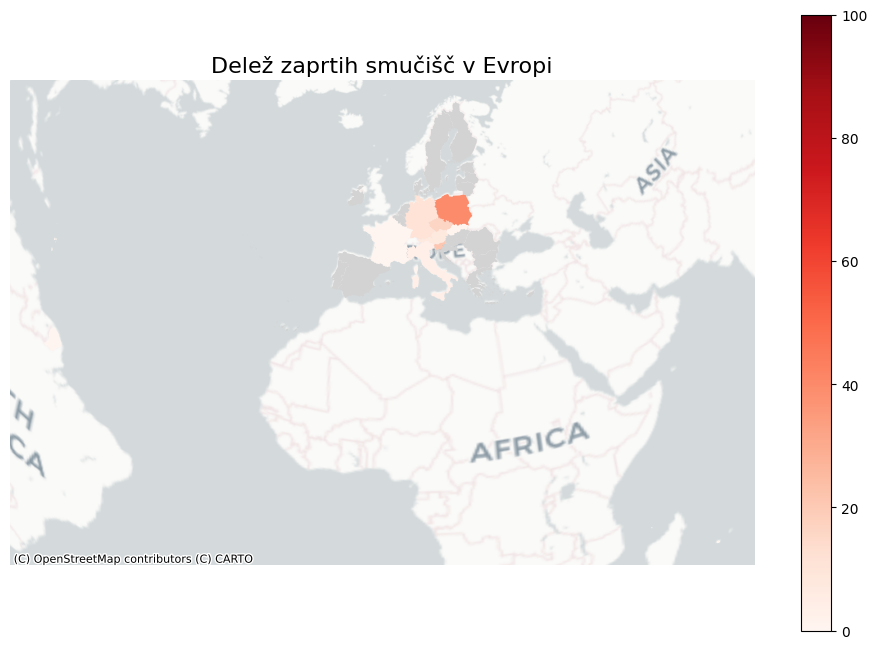

In [98]:
svet = gpd.read_file("svet.geojson")
evropa = svet[svet["EU_STAT"] == "T"]
podatki = odprta_in_zaprta.drop(["zaprta", "vsa"], axis="columns")

df_smucisca = gpd.GeoDataFrame(podatki)
evropa_podatki = evropa.merge(
    df_smucisca,
    left_on="CNTR_ID",
    right_on="drzava",
    how="left"
)

fig, ax = plt.subplots(figsize=(12, 8))

evropa_podatki.plot(
    column='odstotek',
    cmap='Reds',
    legend=True,
    ax=ax,
    missing_kwds={'color': 'lightgrey'},
    vmin=0,
    vmax=100
)

ctx.add_basemap(
    ax,
    crs=evropa_podatki.crs.to_string(),
    source=ctx.providers.CartoDB.Positron
)

ax.set_title('Delež zaprtih smučišč v Evropi', fontsize=16)
plt.axis('off')
plt.show()

## ZAKLJUčEK

Pri analizi velikosti smučišč s spletne strani Bergfex smo prišli do ugotovitve, da je največje italijansko smučišče Sellaronda s 478 kilometri smučarskih prog, obstajajo pa tudi resorti, ki povezujejo več smučišč in zato ponujajo tudi precej več kilometrov prog. Večja smučišča se nahajajo predvsem v Italiji in Švici, ostale države imajo manjša smučišča.

Po skupnem seštevku dolžine prog prednjači Avstrija, ki je tudi država z največ smučišči na prebivalca. Prišli smo tudi do ugotovitve, da po kilometrih oz. metrih prog na prebivalca vodi Andorra.

Na splošno se več kot četrtina vseh analiziranih smučišč nahaja v Avstriji, velik delež tudi v Franciji, Švici in Italiji, ostale države imajo znatno manjše število smučišč.

Našli smo povezavo med ceno smučarskih vozovnic in kilometri prog na smučiščih, ki sta po pričakovanjih premo sorazmerni. Žal smo zaradi razlik v valutah lahko analizirali le smučišča iz euro območja, drugih valut se nam zaradi manjšega števila predstavnikov ni zdelo smiselno posebej analizirati.

Poskusili smo izluščiti tudi zaprta oz. opuščena smučišča (določili smo jih na podlagi nedostopnosti podatkov o ceni vozovnice ter tudi dolžini prog). Prišli smo do zaključka, da je največji delež smučišč v pretekli sezoni zaprla Poljska, sledi ji Slovenija.

Predvsem v zadnjem delu analize, torej delež neobratujočih smučišč, dopuščam možnost za netočnost podatkov. Mogoče je, da izbrani kriterij ni povsem zanesljiv, saj na seznamu sploh ni Hrvaške, čeprav se v zadnjih letih sooča z velikimi težavami glede smučarskih sezon. Prav tako bi bila vizualna predstavitev lahko bolj estetsko dovršena.

Zaradi strukture spletne strani Bergfex ni bilo mogoče pobrati vseh podatkov, ki so nas zanimali, zato nismo analizirali npr. trenutno odprtih smučišč (poletna sezona 2025), števila žičnic in sedežnic ... Žal pa ne obstaja spletna stran, ki bi zajemala toliko smučišč in s toliko karakteristikami, zato bi se tudi pri ponovni analizi zopet odločila za Bergfex, le da bi poiskala še dodatne vire.